In [5]:
#Data Preprocessing Phase

In [6]:
# 1. Importing the necessary datasets - numpy, matplotlib, seaborn and pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 2. Importing the dataset -> german_credit_data

credit_data = pd.read_csv(r'../Data/german_credit_data.csv')

In [8]:
# 3. Analysing the dataset 

#    i. Using head function

credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
#    ii. Using describe function

credit_data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [10]:
#    iii. Using info function

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
 # since there is no need for the 'Unnamed' column we can drop it using the drop function

credit_data.drop('Unnamed: 0', inplace=True, axis=1)

In [12]:
# 4. Handling Missing Values

#    i. Check for missing values

credit_data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [13]:
#    ii. Replace the missing values using mode of the column (Saving Accounts & Checking Accounts)

credit_data["Saving accounts"].fillna(credit_data["Saving accounts"].mode()[0], inplace=True)
credit_data["Checking account"].fillna(credit_data["Checking account"].mode()[0], inplace=True)

<AxesSubplot:>

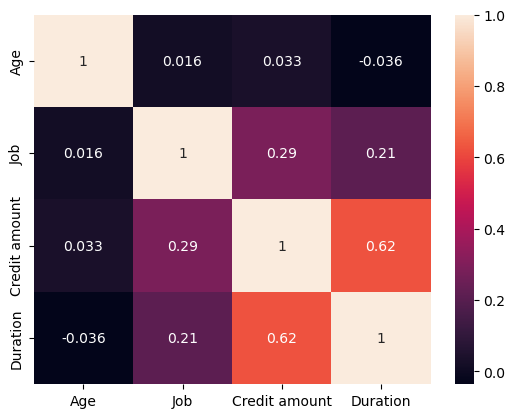

In [14]:
#    iii. Check if the missing values have been handled using visualization tools

sns.heatmap(credit_data.corr(), annot=True)

In [15]:
# 5. Data Visualization - using correlation plots, heat-map, pair-plots and scatterplots

#      i. correlation plots

credit_data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


<AxesSubplot:>

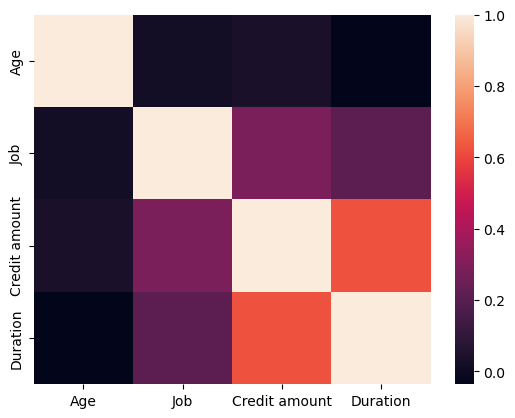

In [16]:
#      ii. heat-map of correlation plot

plot = credit_data.corr()
sns.heatmap(plot,xticklabels=plot.columns.values,yticklabels=plot.columns.values)

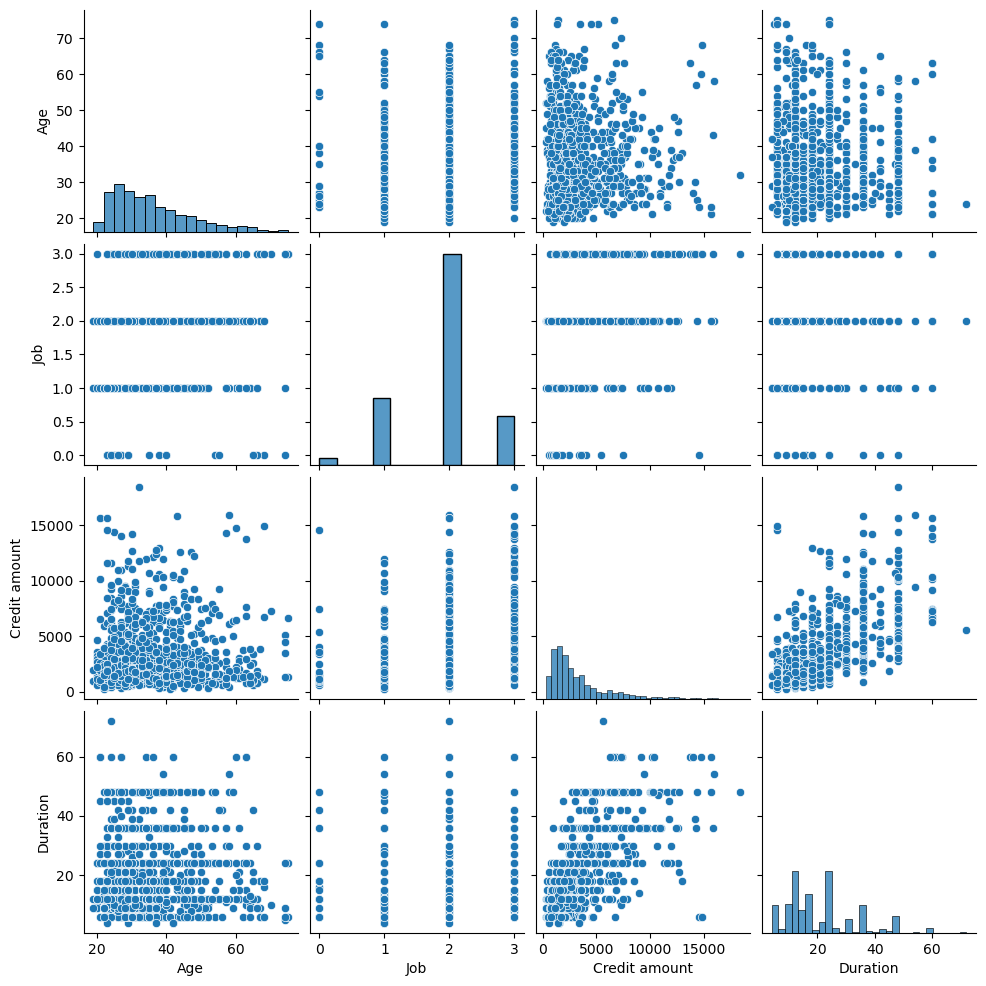

In [17]:
#      iii. pair-plots

sns.pairplot(data=credit_data, markers=["^","v"], palette="magma")

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

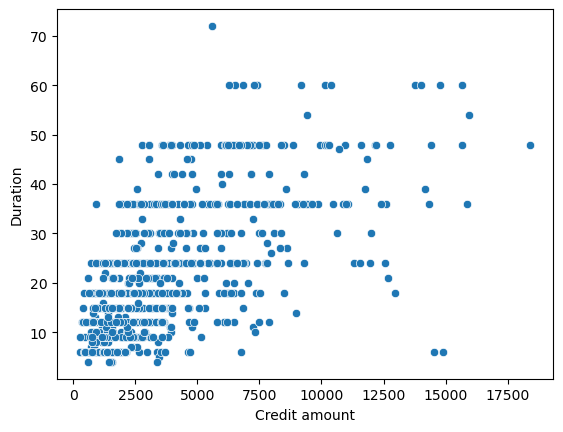

In [18]:
#      iv. scatterplots

sns.scatterplot(x="Credit amount", y="Duration", data=credit_data)

In [19]:
# 6. Label Encoding - from the info function we can see that sex, housing, checking account, purpose, risk and 
#                     and saving accounts are in object64 format and needs to be converted to int64.

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
credit_data["Sex"] = LE.fit_transform(credit_data["Sex"])
credit_data["Housing"] = LE.fit_transform(credit_data["Housing"])
credit_data["Checking account"] = LE.fit_transform(credit_data["Checking account"])
credit_data["Purpose"] = LE.fit_transform(credit_data["Purpose"])
credit_data["Risk"] = LE.fit_transform(credit_data["Risk"])
credit_data["Saving accounts"] = LE.fit_transform(credit_data["Saving accounts"])

In [20]:
credit_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


In [21]:
# checking data to see the changes

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [22]:
# 7. Splitting the data into independent (x) and dependent (y) variables and assigning them to variables

x = credit_data.iloc[:,1:9].values
y = credit_data.iloc[:,9].values

In [23]:
x

array([[   1,    2,    1, ..., 1169,    6,    5],
       [   0,    2,    1, ..., 5951,   48,    5],
       [   1,    1,    1, ..., 2096,   12,    3],
       ...,
       [   1,    2,    1, ...,  804,   12,    5],
       [   1,    2,    0, ..., 1845,   45,    5],
       [   1,    2,    1, ..., 4576,   45,    1]])

In [24]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [25]:
x[0]

array([   1,    2,    1,    0,    0, 1169,    6,    5])

In [26]:
# reviewing the data after split

print(x.shape)
print()
print(y.shape)

(1000, 8)

(1000,)


In [27]:
# 8. Performing OneHotEncoding

from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()

a = oe.fit_transform(x[:,2:3]).toarray() #housing 

b = oe.fit_transform(x[:,3:4]).toarray() #savings account

c = oe.fit_transform(x[:,4:5]).toarray() #checking account

t = oe.fit_transform(x[:,7:8]).toarray() #purpose

x = np.delete(x,[2,3,4,7], axis=1)
x = np.concatenate((t,a,b,c,x), axis=1)

In [28]:
x[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 1.169e+03, 6.000e+00])

In [29]:
x[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 1.169e+03, 6.000e+00])

In [30]:
# 9. Splitting the dataset into training data and testing data using the 75:25 split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [31]:
# checking the sizes of the traning and testing data

print(x_train.shape)
print()
print(x_test.shape)

(750, 22)

(250, 22)


In [32]:
# 10. Feature Scaling - to minimize the range of x values

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [33]:
x_train[0]

array([-0.33085866, -0.70498652, -0.11624764, -0.25856591,  2.20439901,
       -0.6298    , -0.15681251, -0.12200402, -0.34554737,  0.62773565,
       -0.4621604 , -1.95926253,  3.14158642, -0.26148818, -0.23102118,
        0.70075222, -0.60096716, -0.26148818,  0.65465367,  0.16292637,
        0.32090437,  0.27781426])

In [34]:
# Model Building Phase

In [35]:
# 1. Training and Testing the Model - chosen model is RandomForestClassifier

from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train, y_train.ravel())

SVC(kernel='linear')

In [36]:
# 2. Making the predictions using the model

y_pred = svm.predict(x_test)
print(y_pred.shape)
y_pred

(250,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
# 3. Measuring the performance of the model using - accuracy, recall, f1, confusion matrix

#    i. Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print()
print(cm)

Confusion Matrix: 

[[  0  74]
 [  0 176]]


In [38]:
#    ii. Accuracy Score

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print("Accuracy Score: ")
print()
print(accuracy)

Accuracy Score: 

176


In [39]:
#    iii. Recall Score

from sklearn.metrics import recall_score
rs = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ")
print()
print(rs)

Recall Score: 

0.704


In [40]:
#    iv. F1 Score

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ")
print()
print(f1)

F1 Score: 

0.704


In [42]:
# 4. Saving the model

import pickle
pickle.dump(svm,open("risk.pkl", "wb"))